In [1]:
#Make python screen wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import wget
import pandas as pd
import statistics as st
from scipy import stats

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#increase the width of the line
large_width = 400
np.set_printoptions(linewidth=large_width)

## Homework

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [5]:
wget.download("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

100% [..........................................................................] 1423529 / 1423529

'housing.csv'


### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 
> ANSWER  
  It doesn't look like a long tail type of distribution:  
  a) there is probably a max value calculation set at 500000  
  b) it is a right-skewer distribution (tail is on the right)

In [6]:
data_raw=pd.read_csv('housing.csv')

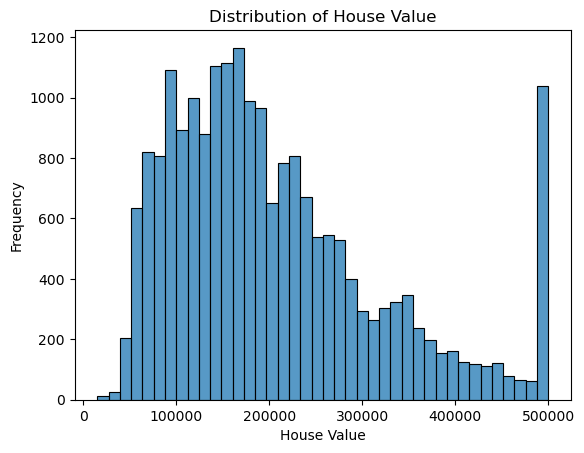

In [8]:
sns.histplot(data_raw.median_house_value, bins=40)
plt.ylabel('Frequency')
plt.xlabel('House Value')
plt.title('Distribution of House Value')
plt.show()

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

In [11]:
data = data_raw[['latitude', 'longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Question 1

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508

> ANSWER  
  Total Bedrooms - 207

In [13]:
df_nullx = data.isnull().sum().to_frame('nulls')
df_nullx

,nulls
latitude,0
longitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0


### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188

> ANSWER  
  1166

In [14]:
data_median = np.median(data['population'])
data_median

1166.0

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [20]:
np.random.seed(42)
n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

data_shuffle = data.iloc[idx]

df_train = data_shuffle.iloc[:n_train].copy()
df_test   = data_shuffle.iloc[n_train:n_train+n_test].copy()
df_val  = data_shuffle.iloc[n_train+n_test:].copy()

#creates an array to preserve original target variable data

y_train_orig = df_train.median_house_value.values 
y_val_orig   = df_val.median_house_value.values
y_test_orig  = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val   = np.log1p(df_val.median_house_value.values)
y_test  = np.log1p(df_test.median_house_value.values)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good
> ANSWER  
  Both are equally good

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [51]:
#adjusted function for imputation to 0

def prepare_X_impute(df, impute_val):
    df_num = df.copy()
    df_num = df_num.fillna(impute_val)
    X = df_num.values
    return X

In [62]:
#use previously defined functions prepare_X, rmse, and train_linear_regression

data = data_raw[['latitude', 'longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']].copy()

def run_seed_impute(seed_num):
    np.random.seed(seed_num)
    n = len(data)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
   
    idx = np.arange(n)
    np.random.shuffle(idx)

    data_shuffle = data.iloc[idx]
    data_shuffle.head()

    df_train = data_shuffle.iloc[:n_train].copy()
    df_test   = data_shuffle.iloc[n_train:n_train+n_test].copy()
    df_val  = data_shuffle.iloc[n_train+n_test:].copy()

    #target variable original
    y_train_orig = df_train.median_house_value.values 
    y_val_orig   = df_val.median_house_value.values
    y_test_orig  = df_test.median_house_value.values
          
    y_train = np.log1p(df_train.median_house_value.values)
    y_val   = np.log1p(df_val.median_house_value.values)
    y_test  = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    mean_train = df_train['total_bedrooms'].mean()
    
    #impute 0
    
    X_train_0 = prepare_X_impute(df_train, 0)
    X_val_0   = prepare_X_impute(df_val, 0)
    X_test_0  = prepare_X_impute(df_test, 0)
    
    w_0, w = train_linear_regression(X_train_0, y_train)
    
    y_train_pred_0 = w_0 + X_train_0.dot(w)
    y_val_pred_0   = w_0 + X_val_0.dot(w)
        
    #impute mean (only training)
    
    X_train_mean = prepare_X_impute(df_train, mean_train)
    X_val_mean   = prepare_X_impute(df_val, mean_train)
    X_test_mean  = prepare_X_impute(df_test, mean_train)
    
    w_0, w = train_linear_regression(X_train_mean, y_train)
    
    y_train_pred_mean = w_0 + X_train_mean.dot(w)
    y_val_pred_mean   = w_0 + X_val_mean.dot(w)
    
    return round(rmse(y_val, y_val_pred_0),2), round(rmse(y_val, y_val_pred_mean),2)

In [63]:
run_seed_impute(42)

(0.35, 0.35)


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001
> ANSWER  
  0.001


In [31]:
base = ['latitude', 'longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']

In [32]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [33]:
def train_linear_regression_reg(X, y, r=0.0):
    #create and append first column as ones
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    
    #identity matrix square matrix (nvar X nvar in shape)* *** r changes in the diagonal
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [34]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [35]:
X_train = prepare_X(df_train)
X_val   = prepare_X(df_val)

In [36]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    
    print('%10s, %.2f' % (r, rmse(y_val, y_pred))) #two decimal digits
    print('%10s, %.10f' % (r, rmse(y_val, y_pred))) #to check the smallest one

         0, 0.17
         0, 0.1671411294
     1e-06, 0.17
     1e-06, 0.1671411288
    0.0001, 0.17
    0.0001, 0.1671410640
     0.001, 0.17
     0.001, 0.1671404813
      0.01, 0.17
      0.01, 0.1671352650
       0.1, 0.17
       0.1, 0.1671295375
         1, 0.17
         1, 0.1677850634
         5, 0.17
         5, 0.1686461704
        10, 0.17
        10, 0.1688503108


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- 0.005
- 0.15555

> ANSWER  
  0.005

In [37]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [38]:
#adjusted function
def prepare_X_2(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [39]:
#use previously defined functions prepare_X, rmse, and train_linear_regression

data = data_raw[['latitude', 'longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

def run_seed(seed_num):
    np.random.seed(seed_num)
    n = len(data)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
   
    idx = np.arange(n)
    np.random.shuffle(idx)

    data_shuffle = data.iloc[idx]
    data_shuffle.head()

    df_train = data_shuffle.iloc[:n_train].copy()
    df_test   = data_shuffle.iloc[n_train:n_train+n_test].copy()
    df_val  = data_shuffle.iloc[n_train+n_test:].copy()

    #target variable original
    y_train_orig = df_train.median_house_value.values 
    y_val_orig   = df_val.median_house_value.values
    y_test_orig  = df_test.median_house_value.values
          
    y_train = np.log1p(df_train.median_house_value.values)
    y_val   = np.log1p(df_val.median_house_value.values)
    y_test  = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
#     return df_train
    
    X_train = prepare_X_2(df_train)
    X_val   = prepare_X_2(df_val)
    X_test  = prepare_X_2(df_test)
    
    w_0, w = train_linear_regression(X_train, y_train)
    
    y_train_pred = w_0 + X_train.dot(w)
    y_val_pred   = w_0 + X_val.dot(w)

    return rmse(y_val, y_val_pred)

In [41]:
a = []
for sd in range(10):
    run_result = run_seed(sd) 
    a.append(run_result)
print(a)

[0.33753831268759427, 0.3379506305304727, 0.34822468621183567, 0.3369910712248624, 0.33666395848447805, 0.33575495676425154, 0.3425103903347186, 0.3460651298790514, 0.34835762061865505, 0.3456992317176127]


In [42]:
st = np.std(a)
round(st,3)

0.005

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245
> ANSWER  
  0.35

In [43]:
#use previously defined functions prepare_X, rmse, and train_linear_regression

data = data_raw[['latitude', 'longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

def run_seed_2(seed_num):
    np.random.seed(seed_num)
    n = len(data)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
   
    idx = np.arange(n)
    np.random.shuffle(idx)

    data_shuffle = data.iloc[idx]
    data_shuffle.head()

    df_train = data_shuffle.iloc[:n_train+n_test].copy() #60%+20% of data
    df_test   = data_shuffle.iloc[n_train+n_test:].copy() #remaining 20% of data

    #target variable original
    y_train_orig = df_train.median_house_value.values 
    y_test_orig  = df_test.median_house_value.values
          
    y_train = np.log1p(df_train.median_house_value.values)
    y_test  = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_test['median_house_value']
     
    X_train = prepare_X_2(df_train)
    X_test  = prepare_X_2(df_test)
    
    #use previously defined function (regularization)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=1) 
    
    y_train_pred = w_0 + X_train.dot(w)
    y_test_pred   = w_0 + X_test.dot(w)

    return rmse(y_test, y_test_pred)

In [44]:
round(run_seed_2(9),3)

0.349